# 이미지 블렌딩(Image Blending)

`cv2.addWeighted()`

- 두 이미지를 blending 할 수 있음
- blending 하려는 두 이미지의 사이즈가 같아야함

- [Simple Formula]  
  # $\quad g(x) = (1 - \alpha) f_0(x) + \alpha f_1(x)$

    - $\beta = 1 - \alpha$

    -  $\alpha, \beta $ 의 값을 통해 어떤 이미지를 더 강하게 드러내고, 어떤 이미지를 더 약하게 드러낼지 결정

    - $\gamma$ 추가 가능 (optional)


- do-not-copy.jpg (https://mdxenglish.files.wordpress.com/2014/08/do-not-copy.jpg)
  
  <img src="https://mdxenglish.files.wordpress.com/2014/08/do-not-copy.jpg" width="400">


- fashion.jpg (https://cdn.pixabay.com/photo/2020/06/20/12/55/fashion-5320934_960_720.jpg)

  <img src="https://cdn.pixabay.com/photo/2020/06/20/12/55/fashion-5320934_960_720.jpg">

In [ ]:
!wget -O do-not-copy.jpg https://mdxenglish.files.wordpress.com/2014/08/do-not-copy.jpg
!wget -O fashion.jpg https://cdn.pixabay.com/photo/2020/06/20/12/55/fashion-5320934_960_720.jpg

--2022-02-21 13:22:03--  https://mdxenglish.files.wordpress.com/2014/08/do-not-copy.jpg
Resolving mdxenglish.files.wordpress.com (mdxenglish.files.wordpress.com)... 192.0.72.22, 192.0.72.23
Connecting to mdxenglish.files.wordpress.com (mdxenglish.files.wordpress.com)|192.0.72.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200099 (195K) [image/jpeg]
Saving to: ‘do-not-copy.jpg’

do-not-copy.jpg     100%[===================>] 195.41K  --.-KB/s    in 0.09s   

2022-02-21 13:22:03 (2.16 MB/s) - ‘do-not-copy.jpg’ saved [200099/200099]

--2022-02-21 13:22:03--  https://cdn.pixabay.com/photo/2020/06/20/12/55/fashion-5320934_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.20.183, 104.18.21.183, 2606:4700::6812:15b7, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.20.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69381 (68K) [image/jpeg]
Saving to: ‘fashion.jpg’

fashion.jpg         100%[==================

In [ ]:
img1 = cv2.imread('/content/fashion.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread('/content/do-not-copy.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

(720, 720, 3)


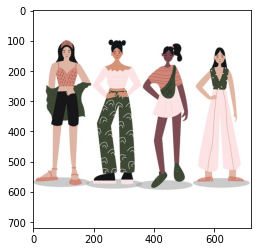

In [ ]:
print(img1.shape)
plt.imshow(img1)
plt.show()

(1920, 1915, 3)


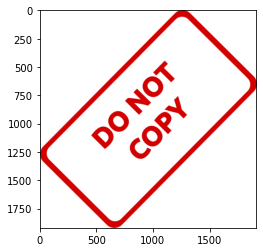

In [ ]:
print(img2.shape)
plt.imshow(img2)
plt.show()

In [ ]:
img1 = cv2.resize(img1, (640,640))
img2 = cv2.resize(img2, (640,640))

(640, 640, 3)


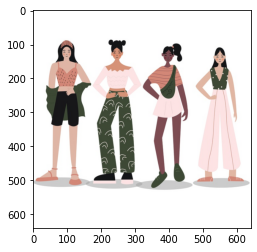

In [ ]:
print(img1.shape)
plt.imshow(img1)
plt.show()

(640, 640, 3)


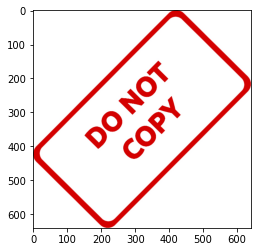

In [ ]:
print(img2.shape)
plt.imshow(img2)
plt.show()

In [ ]:
blended = cv2.addWeighted(src1=img1, alpha=0.5, src2=img2, beta=0.5, gamma=0)

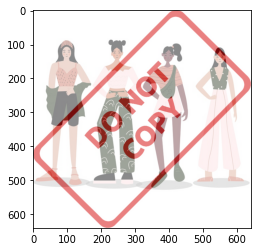

In [ ]:
plt.imshow(blended)
plt.show()

In [ ]:
blended2 = cv2.addWeighted(src1=img1, alpha=0.8, src2=img2, beta=0.1, gamma=0)

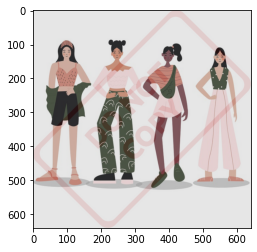

In [ ]:
plt.imshow(blended2)
plt.show()

# 이미지 이진화 (Image Thesholding)


## 기본 임계 처리

`cv2.threshold()`

- 이진화 : 영상을 흑/백으로 분류하여 처리하는 것
  - 기준이 되는 임계값을 어떻게 결정할 것인지가 중요한 문제
  - 임계값보다 크면 백, 작으면 흑이 되는데, 기본 임계처리는 사용자가 고정된 임계값을 결정하고 그 결과를 보여주는 단순한 형태
- 기본적으로 이미지의 segmenting의 가장 간단한 방법

|파라미터|설명|
|--------|----|
|`src`|input image로 single-channel 이미지.(grayscale 이미지)|
|`thresh`|임계값|
|`maxval`|임계값을 넘었을 때 적용할 value|
|`type`|thresholding type|

  - thresholding type
    - `cv2.THRESH_BINARY`  
      - src(x, y) > thresh 일 때, maxval
      - 그 외, 0
    - `cv2.THRESH_BINARY_INV`
      - src(x, y) > thresh 일 때, 0
      - 그 외, maxval
    - `cv2.THRESH_TRUNC`
      - src(x, y) > thresh 일 때, thresh
      - 그 외, src(x, y)
    - `cv2.THRESH_TOZERO`
      - src(x, y) > thresh 일 때, src(x, y)
      - 그 외, 0
    - `cv2.THRESH_TOZERO_INV`
      - src(x, y) > thresh 일 때, 0
      - 그 외, src(x, y)

* letters.jpg (https://cdn.pixabay.com/photo/2018/09/26/09/07/education-3704026_960_720.jpg)

  <img src="https://cdn.pixabay.com/photo/2018/09/26/09/07/education-3704026_960_720.jpg" width="300">


In [ ]:
!wget -O letters.jpg https://cdn.pixabay.com/photo/2018/09/26/09/07/education-3704026_960_720.jpg

--2022-02-21 13:31:20--  https://cdn.pixabay.com/photo/2018/09/26/09/07/education-3704026_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.20.183, 104.18.21.183, 2606:4700::6812:14b7, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.20.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 230133 (225K) [image/jpeg]
Saving to: ‘letters.jpg’

letters.jpg         100%[===================>] 224.74K  --.-KB/s    in 0.04s   

2022-02-21 13:31:20 (5.90 MB/s) - ‘letters.jpg’ saved [230133/230133]



In [ ]:
img = cv2.imread('/content/letters.jpg', 0)

In [ ]:
img.shape

(640, 960)

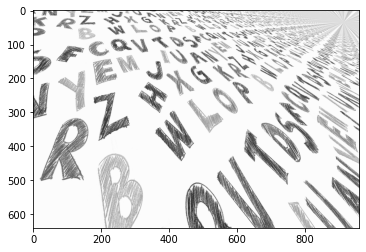

In [ ]:
plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
ret, thresh1 = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 128, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 128, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 128, 255, cv2.THRESH_TOZERO_INV)

In [ ]:
titles = ['Original', 'BINARY', 'BINARY_INV', 'TRUNC','TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

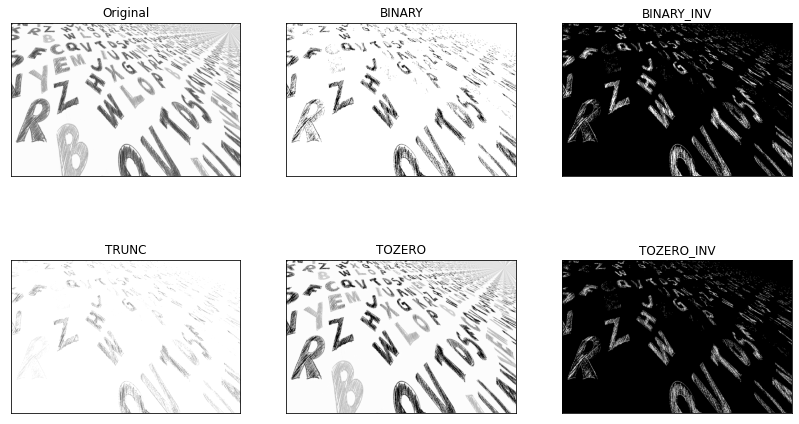

In [ ]:
plt.figure(figsize=(14, 8))
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(images[i], 'gray')
  plt.title(titles[i])
  plt.xticks([])
  plt.yticks([])
plt.show()

- snow.jpg (https://cdn.pixabay.com/photo/2014/12/02/22/05/snowflakes-554635_960_720.jpg)

  <img src="https://cdn.pixabay.com/photo/2014/12/02/22/05/snowflakes-554635_960_720.jpg" width="300">

In [ ]:
!wget -O snow.jpg https://cdn.pixabay.com/photo/2014/12/02/22/05/snowflakes-554635_960_720.jpg

--2022-02-21 13:44:36--  https://cdn.pixabay.com/photo/2014/12/02/22/05/snowflakes-554635_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.21.183, 104.18.20.183, 2606:4700::6812:14b7, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.21.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131195 (128K) [image/jpeg]
Saving to: ‘snow.jpg’

snow.jpg            100%[===================>] 128.12K  --.-KB/s    in 0.01s   

2022-02-21 13:44:36 (9.68 MB/s) - ‘snow.jpg’ saved [131195/131195]



In [ ]:
img2 = cv2.imread('/content/snow.jpg', 0)

In [ ]:
img2.shape

(639, 960)

In [ ]:
ret, thresh1 = cv2.threshold(img2, 128, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img2, 128, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img2, 128, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img2, 128, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img2, 128, 255, cv2.THRESH_TOZERO_INV)

- 시각화

In [ ]:
titles = ['Original', 'BINARY', 'BINARY_INV', 'TRUNC','TOZERO', 'TOZERO_INV']
images = [img2, thresh1, thresh2, thresh3, thresh4, thresh5]

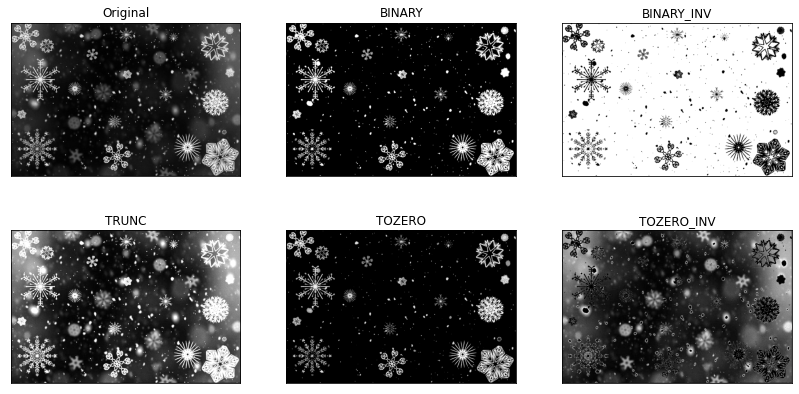

In [ ]:
plt.figure(figsize=(14, 7))
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(images[i], 'gray')
  plt.title(titles[i])
  plt.xticks([])
  plt.yticks([])
plt.show()

## 적응 임계처리

`cv2.adaptiveThreshold()`

- 이전 단계에서는 임계값을 이미지 전체에 적용하여 처리하기 때문에  
  하나의 이미지에 음영이 다르면 일부 영역이 모두 흰색 또는 검정색으로 보여지게 됨
- 이런 문제를 해결하기 위해서 이미지의 작은 영역별로 thresholding

|파라미터|설명|
|--------|----|
|`src`|grayscale image|
|`maxValue`|임계값|
|`adaptiveMethod`|thresholding value를 결정하는 계산 방법|
|`thresholdType`|threshold type|
|`blockSize`|thresholding을 적용할 영역 사이즈|
|`C`|평균이나 가중평균에서 차감할 값|
  
- Adaptive Method
  - `cv2.ADAPTIVE_THRESH_MEAN_C` : 주변영역의 평균값으로 결정
  - `cv2.ADAPTIVE_THRESH_GAUSSIAN_C` : 주변영역의 가우시안 값으로 결정


In [ ]:
img = cv2.imread('/content/letters.jpg', 0)

In [ ]:
ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

In [ ]:
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 2)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 2)

- 시각화

In [ ]:
titles = ['Original', 'Global', 'Mean', 'Gaussian']
images = [img, th1, th2, th3]

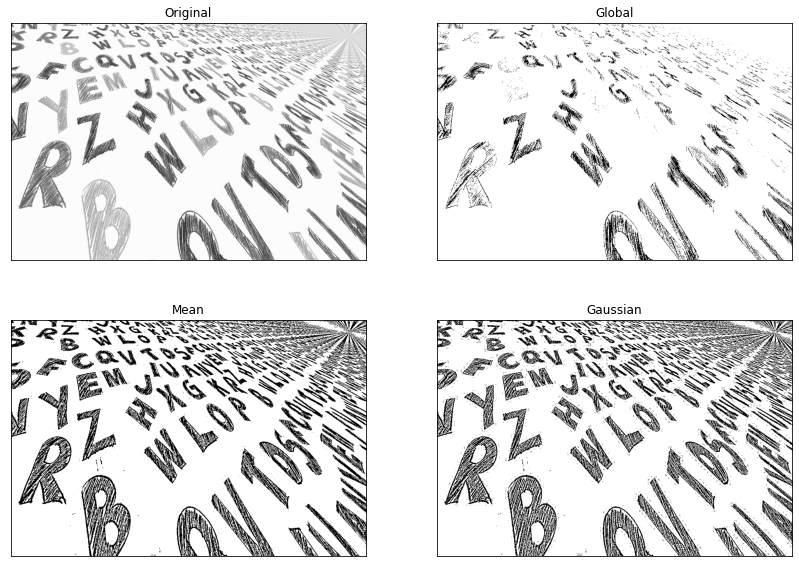

In [ ]:
plt.figure(figsize=(14, 10))
for i in range(4):
  plt.subplot(2, 2, i+1)
  plt.imshow(images[i], cmap='gray')
  plt.title(titles[i])
  plt.xticks([])
  plt.yticks([])

plt.show()

## Otsu의 이진화
- `Otsu의 이진화`(Otsu’s Binarization)란 bimodal image에서 임계값을 자동으로 계산하는 것

- 임계값을 결정하는 가장 일반적인 방법은 trial and error 방식

- bimodal image (히스토그램으로 분석하면 2개의 peak가 있는 이미지)의 경우는 히스토그램에서 임계값을 어느정도 정확히 계산 가능

- `cv2.threshold()` 함수의 flag에 추가로 `cv2.THRESH_OTSU` 를 적용.
  이때 임계값은 0으로 전달

- noise.jpg (https://cdn.pixabay.com/photo/2017/01/04/13/09/star-1951963_960_720.jpg)

  <img src="https://cdn.pixabay.com/photo/2017/01/04/13/09/star-1951963_960_720.jpg" width="300">

In [ ]:
!wget -O noise.jpg https://cdn.pixabay.com/photo/2017/01/04/13/09/star-1951963_960_720.jpg

--2022-02-21 13:58:00--  https://cdn.pixabay.com/photo/2017/01/04/13/09/star-1951963_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.21.183, 104.18.20.183, 2606:4700::6812:14b7, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.21.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 323088 (316K) [image/jpeg]
Saving to: ‘noise.jpg’

noise.jpg           100%[===================>] 315.52K  --.-KB/s    in 0.1s    

2022-02-21 13:58:01 (2.09 MB/s) - ‘noise.jpg’ saved [323088/323088]



In [ ]:
img = cv2.imread('/content/noise.jpg', 0)

In [ ]:
img.shape

(540, 960)

In [ ]:
ret1, th1 = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
blur = cv2.GaussianBlur(img, (5, 5), 0)
ret3, th3 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

- 시각화

In [ ]:
images = [img, 0, th1, img, 0, th2, blur, 0, th3]

titles = ['Original', 'Histogram', 'Gobal Thresholding (t=127)',
          'Original', 'Histogram', 'Otsu Thresholding',
          'Gaussian', 'Histogram', 'Otsu Thresholding']

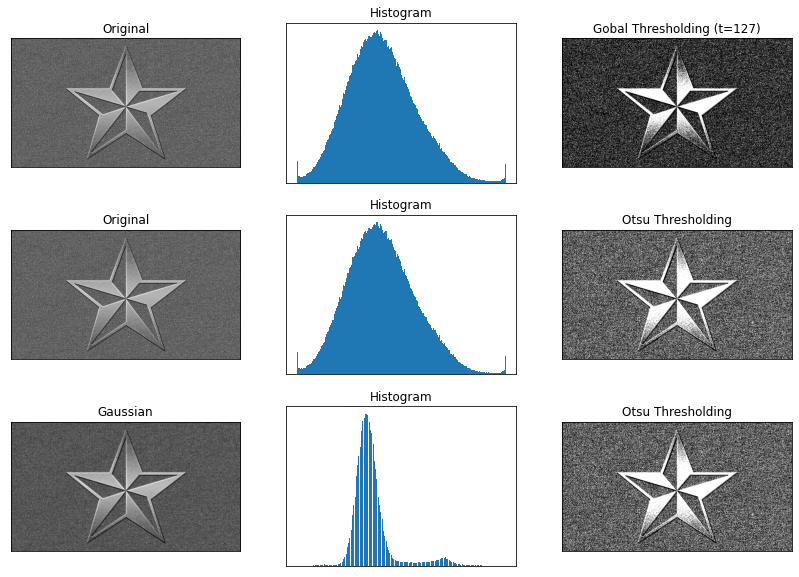

In [ ]:
plt.figure(figsize=(14, 10))
for i in range(3):
  plt.subplot(3, 3, i*3+1)
  plt.imshow(images[i*3], cmap='gray')
  plt.title(titles[i*3])
  plt.xticks([]),
  plt.yticks([])

  plt.subplot(3, 3, i*3+2)
  plt.hist(images[i*3].ravel(), 256)
  plt.title(titles[i*3+1])
  plt.xticks([]),
  plt.yticks([])

  plt.subplot(3, 3, i*3+3)
  plt.imshow(images[i*3+2], cmap='gray')
  plt.title(titles[i*3+2])
  plt.xticks([]),
  plt.yticks([])

plt.show()

# 이미지 필터링(Image Filtering)

`cv2.filter2D()`

- 이미지도 음성 신호처럼 주파수로 표현할 수 있음

- 일반적으로 고주파는 밝기의 변화가 많은 곳, 즉 경계선 영역에서 나타나며, 일반적인 배경은 저주파로 나타냄 

  - 이것을 바탕으로 고주파를 제거하면 Blur처리가 되며, 저주파를 제거하면 대상의 영역을 확인 가능

- Low-pass filter(LPF)와 High-pass filter(HPF)를 이용하여,  
  LPF를 적용하면 노이즈제거나 blur처리를 할 수 있으며, HPF를 적용하면 경계선을 찾을 수 있음

- 일반적으로 많이 사용되는 필터

- ex) $K = \frac{1}{25} \begin{vmatrix} 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\  1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \end{vmatrix}$

- bee.jpg (https://cdn.pixabay.com/photo/2020/10/01/09/35/bee-5618012_960_720.jpg)

  <img src="https://cdn.pixabay.com/photo/2020/10/01/09/35/bee-5618012_960_720.jpg" width="300">

In [ ]:
!wget -O bee.jpg https://cdn.pixabay.com/photo/2020/10/01/09/35/bee-5618012_960_720.jpg

--2022-02-21 14:14:09--  https://cdn.pixabay.com/photo/2020/10/01/09/35/bee-5618012_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.21.183, 104.18.20.183, 2606:4700::6812:15b7, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.21.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71443 (70K) [image/jpeg]
Saving to: ‘bee.jpg’

bee.jpg             100%[===================>]  69.77K  --.-KB/s    in 0.006s  

2022-02-21 14:14:09 (11.5 MB/s) - ‘bee.jpg’ saved [71443/71443]



In [ ]:
img = cv2.imread('/content/bee.jpg')
print(img.shape)

(640, 960, 3)


In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

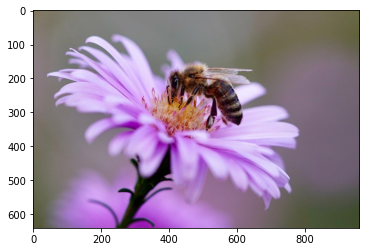

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
kernel = np.ones((5, 5), np.float32) / (25)

In [ ]:
print(kernel.shape)

(5, 5)


In [ ]:
print(kernel)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


In [ ]:
dst = cv2.filter2D(img, -1, kernel)

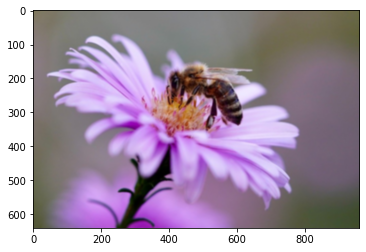

In [ ]:
plt.imshow(dst)
plt.show()

# 이미지 샤프닝(Image Sharpening)



- 출력화소에서 이웃 화소끼리 차이를 크게 해서 날카로운 느낌이 나게 만드는 것
- 영상의 세세한 부분을 강조할 수 있으며, 경계 부분에서 명암대비가 증가되는 효과

- 사프닝 커널
  - 커널 원소들의 값 차이가 커지도록 구성
  - 커널 원소 전체합이 1이 되어야 입력영상 밝기가 손실 없이 출력영상 밝기로 유지


In [ ]:
img = cv2.imread('/content/bee.jpg')
print(img.shape)

(640, 960, 3)


In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

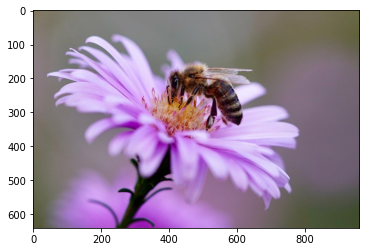

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
kernel = [0, -1, 0,
          -1, 5, -1,
          0, -1, 0]
mask = np.array(kernel, np.float32).reshape(3, 3)
sharpen = cv2.filter2D(img, -1, mask)

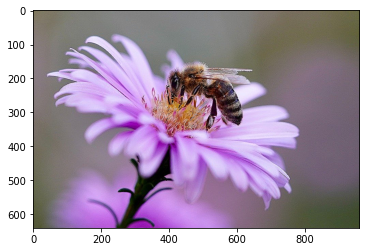

In [ ]:
plt.imshow(sharpen)
plt.show()

In [ ]:
kernel = [-1, -1, -1,
          -1, 9, -1,
          -1, -1, -1]
mask = np.array(kernel, np.float32).reshape(3, 3)
sharpen = cv2.filter2D(img, -1, mask)

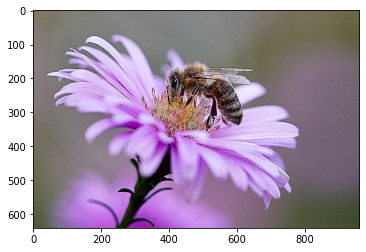

In [ ]:
plt.imshow(sharpen)
plt.show()

# 이미지 블러링(Image Blurring)
- low-pass filter를 이미지에 적용하여 얻을 수 있음

- 고주파영역을 제거함으로써 노이즈를 제거하거나 경계선을 흐리게 할 수 있음

- OpenCV에서 제공하는 blurring 방법
  - `Averaging`

  - `Gaussian Filtering`

  - `Median Filtering`

  - `Bilateral Filtering`

### Averaging
- Box형태의 kernel을 이미지에 적용한 후 평균값을 box의 중심점에 적용하는 형태

- `cv2.blur()` 또는 `cv2.boxFilter()` 

- `cv2.blur()`
  - Parameters	
    - `src` : Chennel수는 상관없으나,  
        depth(Data Type)은 CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.

    - `ksize` : kernel 사이즈(ex; (3,3))

  - ex)  $\ K = \frac{1}{9} \begin{vmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\  1 & 1 & 1 \end{vmatrix}$

<br>

- 이미지의 Data Type

|데이터 타입|설명|
|-----------|----|
|`CV_8U`|8-bit unsigned integer: uchar ( 0..255 )|
|`CV_8S`|8-bit signed integer: schar ( -128..127 )|
|`CV_16U`|16-bit unsigned integer: ushort ( 0..65535 )|
|`CV_16S`|16-bit signed integer: short ( -32768..32767 )|
|`CV_32S`|32-bit signed integer: int ( -2147483648..2147483647 )|
|`CV_32F`|32-bit floating-point number: float ( -FLT_MAX..FLT_MAX, INF, NAN )|
|`CV_64F`|64-bit floating-point number: double ( -DBL_MAX..DBL_MAX, INF, NAN )|

  - 일반적으로 Data Type과 채널수가 같이 표현이 되어 CV_8UC1 과 같이 표현  
    (8bit unsiged integer이면서 채널이 1개)

In [ ]:
img = cv2.imread('/content/bee.jpg')
print(img.shape)

(640, 960, 3)


In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

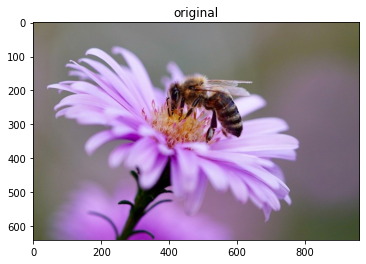

In [ ]:
plt.title('original')
plt.imshow(img)
plt.show()

In [ ]:
dst1 = cv2.blur(img, (7, 7))

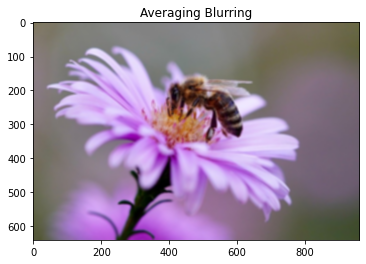

In [ ]:
plt.title('Averaging Blurring')
plt.imshow(dst1)
plt.show()

### Gaussian Filtering

`cv2.GaussianBlur()`

- box filter는 동일한 값으로 구성된 kernel을 사용하지만, Gaussian Filter는 Gaussian함수를 이용한 Kernel을 적용
  - kernel 행렬의 값을 Gaussian 함수를 통해서 수학적으로 생성하여 적용
- kernel의 사이즈는 양수이면서 홀수로 지정을 해야 됨
- 이미지의 Gaussian Noise (전체적으로 밀도가 동일한 노이즈, 백색노이즈)를 제거하는 데 가장 효과적

|파라미터|설명|
|--------|----| 
|`img`|Chennel수는 상관없으나, depth(Data Type)은 CV_8U, CV_16U, CV_16S, CV_32F or CV_64F|
|`ksize`|(width, height) 형태의 kernel size, width와 height는 서로 다를 수 있지만, 양수의 홀수로 지정해야 함|
|`sigmaX`|Gaussian kernel standard deviation in X direction|

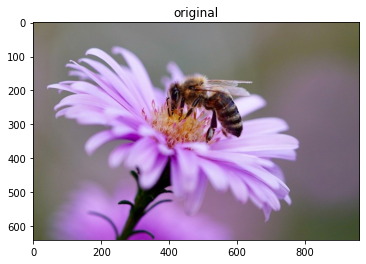

In [ ]:
plt.title('original')
plt.imshow(img)
plt.show()

In [ ]:
dst2 = cv2.GaussianBlur(img, (5, 5), 0)

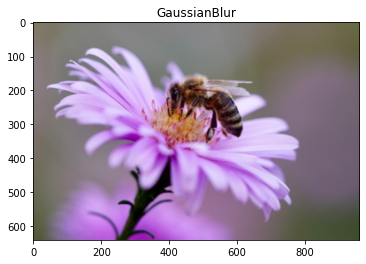

In [ ]:
plt.title('GaussianBlur')
plt.imshow(dst2)
plt.show()

### Median Filtering

`cv2.medianBlur()`

- kernel window와 pixel의 값들을 정렬한 후에 중간값을 선택하여 적용
- salt-and-pepper noise 제거에 가장 효과적

|파라미터|설명|
|--------|----|
|`src`|1, 3, 4 channel image, depth가 CV_8U, CV_16U, or CV_32F 이면 ksize는 3또는5, CV_8U이면 더 큰 ksize가능|
|`ksize`|1보다 큰 홀수|



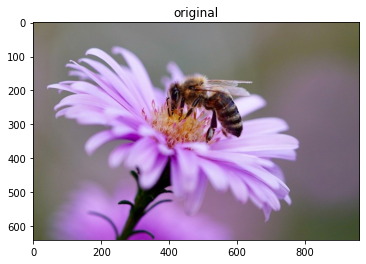

In [ ]:
plt.title('original')
plt.imshow(img)
plt.show()

In [ ]:
dst3 = cv2.medianBlur(img, 9)

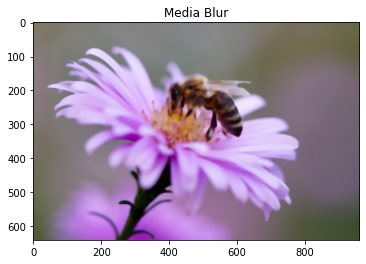

In [ ]:
plt.title('Media Blur')
plt.imshow(dst3)
plt.show()

### Bilateral Filtering

`cv2.bilateralFilter()`

- 위 3가지 Blur 방식은 경계선까지 Blur 처리가 되어, 경계선이 흐려지게 됨
-  Bilateral Filtering(양방향 필터)은 경계선을 유지하면서 Gaussian Blur처리를 해주는 방법

|파라미터|설명|
|--------|----|
|`src`|8-bit, 1 or 3 Channel image|
|`d`|filtering시 고려할 주변 pixel 지름|
|`sigmaColor`|Color를 고려할 공간. 숫자가 크면 멀리 있는 색도 고려|
|`sigmaSpace`|숫자가 크면 멀리 있는 pixel도 고려|

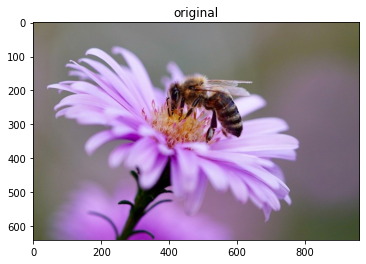

In [ ]:
plt.title('original')
plt.imshow(img)
plt.show()

In [ ]:
dst4 = cv2.bilateralFilter(img, 9, 75, 75)

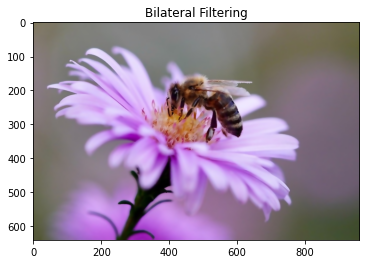

In [ ]:
plt.title('Bilateral Filtering')
plt.imshow(dst4)
plt.show()

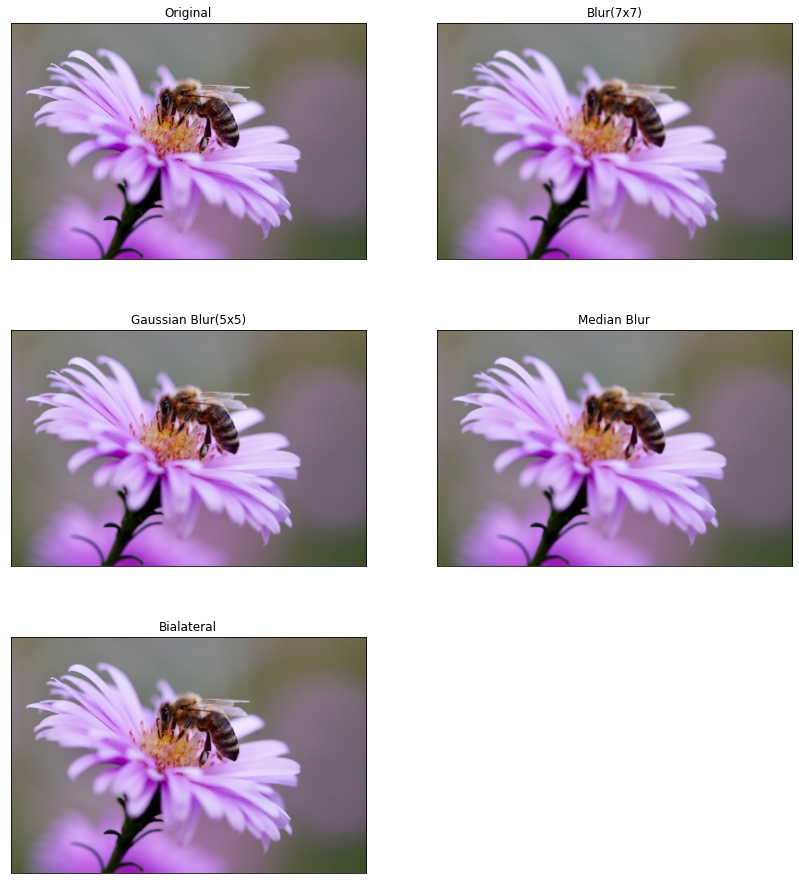

In [ ]:
plt.figure(figsize=(14, 16))
images = [img, dst1, dst2, dst3, dst4]
titles = ['Original', 'Blur(7x7)', 'Gaussian Blur(5x5)', 'Median Blur', 'Bialateral']
for i in range(5):
  plt.subplot(3, 2, i+1)
  plt.imshow(images[i])
  plt.title(titles[i])
  plt.xticks([])
  plt.yticks([])

plt.show()

# 형태학적 변환(Morphological Transformations)

- 이미지를 Segmentation하여 단순화, 제거, 보정을 통해서 형태를 파악하는 목적으로 사용
- 일반적으로 binary나 grayscale image에 사용
- 사용하는 방법으로는 Dilation(팽창), Erosion(침식), 그리고 2개를 조합한 Opening과 Closing이 있음
- 여기에는 2가지 Input값이 있는데, 하나는 원본 이미지이고 또 다른 하나는 structuring element

- structuring element
  - 원본 이미지에 적용되는 kernel
  - 중심을 원점으로 사용할 수도 있고, 원점을 변경할 수도 있음
  - 일반적으로 꽉찬 사각형, 타원형, 십자형을 많이 사용

- j.png (https://docs.opencv.org/4.5.2/j.png)

  <img src="https://docs.opencv.org/4.5.2/j.png">

In [ ]:
!wget -O j.png https://docs.opencv.org/4.5.2/j.png

--2022-02-21 14:40:43--  https://docs.opencv.org/4.5.2/j.png
Resolving docs.opencv.org (docs.opencv.org)... 104.21.24.86, 172.67.218.21, 2606:4700:3033::6815:1856, ...
Connecting to docs.opencv.org (docs.opencv.org)|104.21.24.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1126 (1.1K) [image/png]
Saving to: ‘j.png’

j.png               100%[===================>]   1.10K  --.-KB/s    in 0s      

2022-02-21 14:40:43 (3.20 MB/s) - ‘j.png’ saved [1126/1126]



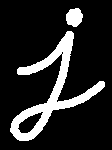

In [ ]:
img = cv2.imread('j.png', 0)
cv2_imshow(img)

### Erosion

`cv2.erode()`

- 각 Pixel에 structuring element를 적용하여 하나라도 0이 있으면 대상 pixel을 제거하는 방법
- 작은 object를 제거하는 효과

|파라미터|설명|
|--------|----|
|`src`|the depth should be one of CV_8U, CV_16U, CV_16S, CV_32F or CV_64F|
|`kernel`|structuring element. cv2.getStructuringElemet() 함수로 만들 수 있음|
|`anchor`|structuring element의 중심. default (-1,-1)로 중심점|
|`iterations`|erosion 적용 반복 횟수|

- 아래 그림은 대상 이미지에 십자형 structuring element를 적용한 결과

  <img src="https://opencv-python.readthedocs.io/en/latest/_images/image01.png">

  <sub>[이미지 출처] http://www.kocw.net/home/search/kemView.do?kemId=1127905&ar=relateCourse</sub>



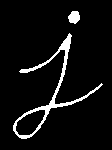

In [ ]:
kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(img, kernel, iterations=1)
cv2_imshow(erosion)

### Dilation

`cv2.dilation()`

- Erosion과 반대 작용
- 대상을 확장한 후 작은 구멍을 채우는 방법
- Erosion과 마찬가지로 각 pixel에 structuring element를 적용
- 대상 pixel에 대해서 OR 연산을 수행
- 즉, 겹치는 부분이 하나라도 있으면 이미지를 확장

  <img src="https://opencv-python.readthedocs.io/en/latest/_images/image03.png">

|파라미터|설명|
|--------|----|
|`src`|the depth should be one of CV_8U, CV_16U, CV_16S, CV_32F or CV_64F|
|`kernel`|structuring element. cv2.getStructuringElemet() 함수로 만들 수 있음|
|`anchor`|structuring element의 중심. default (-1,-1)로 중심점|
|`iterations`|dilation 적용 반복 횟수|

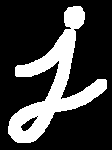

In [ ]:
dilation = cv2.dilate(img, kernel, iterations = 1)
cv2_imshow(dilation)

### Opening & Closing

`cv2.morphologyEx()`

- Opening과 Closing은 Erosion과 Dilation의 조합 결과
- 차이는 어느 것을 먼저 적용을 하는 차이
- `Opening` : Erosion적용 후 Dilation 적용. 작은 Object나 돌기 제거에 적합
- `Closing` : Dilation적용 후 Erosion 적용. 전체적인 윤곽 파악에 적합

<img src="https://opencv-python.readthedocs.io/en/latest/_images/image05.png">

|파라미터|설명|
|--------|----|
|`src`|원본 이미지. 채널수는 상관 없으나, depth는 다음 중 하나여야 함 `CV_8U`, `CV_16U`, `CV_16S`, `CV_32F`, `CV_64F`
|`op`|연산 방법|
|`MORPH_OPEN`|열기 동작|
|`MORPH_CLOSE`|닫기 동작|
|`MORPH_GRADIENT`|a morphological gradient. Dilation과 erosion의 차이|
|`MORPH_TOPHAT`|“top hat”, Opeining과 원본 이미지의 차이|
|`MORPH_BLACKHAT`|“black hat”. Closing과 원본 이미지의 차이|
|`kernel`|structuring element. `cv2.getStructuringElemet()` 함수로 만들 수 있음|
|`anchor`|structuring element의 중심. default (-1,-1)로 중심점|
|`iterations`|erosion과 dilation 적용 횟수|
|`borderType`|픽셀 외삽법 `borderInterpolate` 참고(https://ko.wikipedia.org/wiki/%EB%B3%B4%EC%99%B8%EB%B2%95)|
|`borderValue`|테두리 값|


- opening.png (https://docs.opencv.org/4.5.2/opening.png)

  <img src="https://docs.opencv.org/4.5.2/opening.png">

- closing.png (https://docs.opencv.org/4.5.2/closing.png)

  <img src="https://docs.opencv.org/4.5.2/closing.png">

In [ ]:
!wget -O opening.png https://docs.opencv.org/4.5.2/opening.png
!wget -O closing.png https://docs.opencv.org/4.5.2/closing.png

--2022-02-21 14:52:01--  https://docs.opencv.org/4.5.2/opening.png
Resolving docs.opencv.org (docs.opencv.org)... 104.21.24.86, 172.67.218.21, 2606:4700:3033::6815:1856, ...
Connecting to docs.opencv.org (docs.opencv.org)|104.21.24.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2082 (2.0K) [image/png]
Saving to: ‘opening.png’

opening.png         100%[===================>]   2.03K  --.-KB/s    in 0s      

2022-02-21 14:52:01 (25.0 MB/s) - ‘opening.png’ saved [2082/2082]

--2022-02-21 14:52:01--  https://docs.opencv.org/4.5.2/closing.png
Resolving docs.opencv.org (docs.opencv.org)... 104.21.24.86, 172.67.218.21, 2606:4700:3033::6815:1856, ...
Connecting to docs.opencv.org (docs.opencv.org)|104.21.24.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2205 (2.2K) [image/png]
Saving to: ‘closing.png’

closing.png         100%[===================>]   2.15K  --.-KB/s    in 0s      

2022-02-21 14:52:01 (25.9 MB/s) - ‘closing.png’ saved

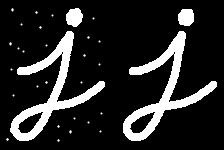

In [ ]:
opening = cv2.imread('opening.png',0)
cv2_imshow(opening)

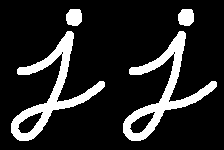

In [ ]:
opening = cv2.morphologyEx(opening, cv2.MORPH_OPEN, kernel)
cv2_imshow(opening)

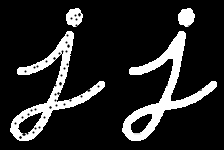

In [ ]:
closing = cv2.imread('closing.png', 0)
cv2_imshow(closing)

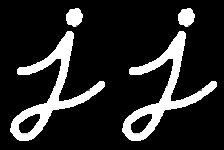

In [ ]:
closing = cv2.morphologyEx(closing, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closing)

### Morphological Gradient

- dilation과 erosion의 차이

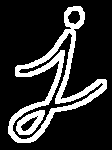

In [ ]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
cv2_imshow(gradient)

### Top Hat

- 입력 이미지와 opening 이미지와의 차이

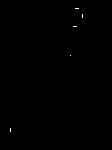

In [ ]:
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
cv2_imshow(tophat)

### Black Hat

- 입력 이미지와 closing 이미지와의 차이

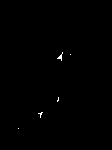

In [ ]:
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
cv2_imshow(blackhat)

### Structuring Element
- 사각형 모양의 structuring element는 numpy 를 통해 만들 수 있음

In [ ]:
kernel = np.ones((5, 5), np.uint8)

In [ ]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

- 원이나 타원 모양이 필요한 경우, `cv2.getStructuringElement()` 이용

  - Parameters
    
    - `shape` :
Element의 모양.

      - `MORPH_RET` : 사각형 모양

      - `MORPH_ELLIPSE` : 타원형 모양

      - `MORPH_CROSS` : 십자 모양

    - `ksize` : structuring element 사이즈

In [ ]:
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
rect_kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [ ]:
ellipse_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
ellipse_kernel

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [ ]:
cross_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))
cross_kernel

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

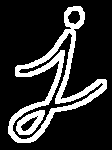

In [ ]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, rect_kernel)
cv2_imshow(gradient)

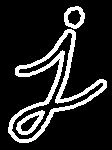

In [ ]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, ellipse_kernel)
cv2_imshow(gradient)

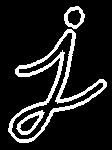

In [ ]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, cross_kernel)
cv2_imshow(gradient)

# 이미지 기울기(Image Gradients)

- Gradient(기울기)는 영상의 edge 및 그 방향을 찾을 때 활용됨

- 이미지 (x, y)에서의 벡터값(밝기와 밝기의 변화하는 방향)을 구해서 해당 pixel이 edge에 얼마나 가까운지, 그 방향이 어디인지 알 수 있음

### Soble & Scharr Filter

`cv2.Sobel()`

- Gaussian smoothing과 미분을 이용
- 노이즈가 있는 이미지에 적용하면 좋음
- X축과 Y축을 미분하는 방법으로 경계값을 계산

|파라미터|설명|
|--------|----|
|`src`|input image|
|`ddepth`|output image의 depth, -1이면 input image와 동일|
|`dx`|x축 미분 차수|
|`dy`|y축 미분 차수|
|`ksize`|kernel size(ksize x ksize)|

- `cv2.Scharr()`: `cv2.Sobel()`과 동일하지만 `ksize`가 soble의 3x3보다 정확하게 적용됨

- travel.jpg (https://cdn.pixabay.com/photo/2020/02/20/19/48/travel-4865665_960_720.jpg)

  <img src="https://cdn.pixabay.com/photo/2020/02/20/19/48/travel-4865665_960_720.jpg" width="300">

In [ ]:
!wget -O travel.jpg https://cdn.pixabay.com/photo/2020/02/20/19/48/travel-4865665_960_720.jpg

--2022-02-21 15:03:10--  https://cdn.pixabay.com/photo/2020/02/20/19/48/travel-4865665_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.21.183, 104.18.20.183, 2606:4700::6812:14b7, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.21.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 184356 (180K) [image/jpeg]
Saving to: ‘travel.jpg’

travel.jpg          100%[===================>] 180.04K  --.-KB/s    in 0.02s   

2022-02-21 15:03:10 (11.2 MB/s) - ‘travel.jpg’ saved [184356/184356]



In [ ]:
img = cv2.imread('/content/travel.jpg', 0)
print(img.shape)

(651, 960)


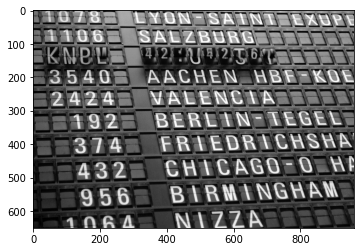

In [ ]:
plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
sobelx = cv2.Sobel(img, cv2.CV_8U, 1, 0, ksize=3)

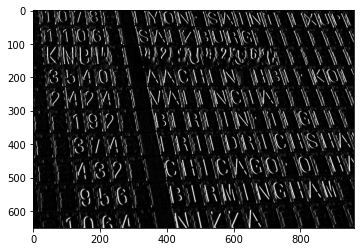

In [ ]:
plt.imshow(sobelx, cmap='gray')
plt.show()

In [ ]:
sobely = cv2.Sobel(img, cv2.CV_8U, 0, 1, ksize=3)

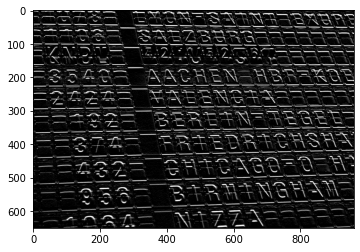

In [ ]:
plt.imshow(sobely, cmap='gray')
plt.show()

In [ ]:
sobelx2 = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)

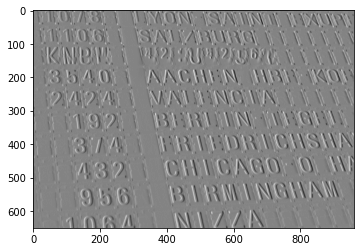

In [ ]:
plt.imshow(sobelx2, cmap='gray')
plt.show()

In [ ]:
sobely2 = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)

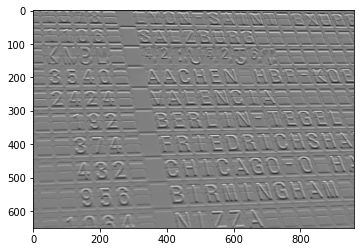

In [ ]:
plt.imshow(sobely2, cmap='gray')
plt.show()

### Laplacian 함수

`cv2.Laplacian()`

- 이미지의 가로와 세로에 대한 Gradient를 2차 미분한 값
- Sobel filter에 미분의 정도가 더해진 것과 비슷함 
- (dx와 dy가 2인 경우) blob(주위의 pixel과 확연한 pixel차이를 나타내는 덩어리)검출에 많이 사용됨

|파라미터|설명|
|--------|----|
|`src`|source image|
|`ddepth`|output image의 depth|


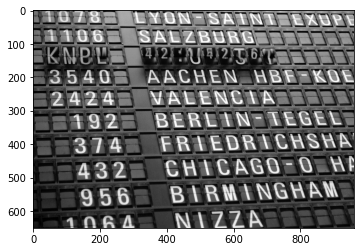

In [ ]:
plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
laplacian = cv2.Laplacian(img, cv2.CV_8U)

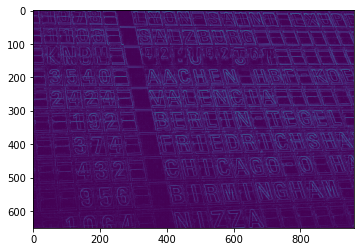

In [ ]:
plt.imshow(laplacian)
plt.show()

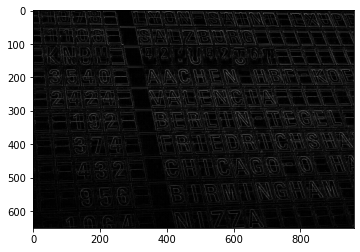

In [ ]:
plt.imshow(laplacian, cmap='gray')
plt.show()

In [ ]:
laplacian2 = cv2.Laplacian(img, cv2.CV_64F)

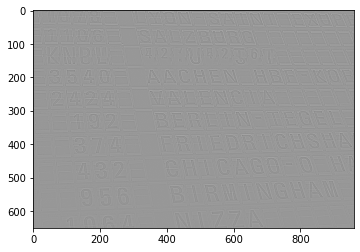

In [ ]:
plt.imshow(laplacian2, cmap='gray')
plt.show()

### Canny Edge Detection

`cv2.Canny()`

- 가장 유명한 Edge Detection 방법
- `Noise Reduction`  
  - 이미지의 Noise를 제거
  - 이때 5x5의 Gaussian filter를 이용
- `Edge Gradient Detection`
  - 이미지에서 Gradient의 방향과 강도를 확인
  - 경계값에서는 주변과 색이 다르기 때문에 미분값이 급속도로 변하게 됨
  - 이를 통해 경계값 후보군을 선별
- `Non-maximum Suppression`
  - 이미지의 pixel을 Full scan하여 Edge가 아닌 pixel은 제거
- `Hysteresis Thresholding`
  - 이제 지금까지 Edge로 판단된 pixel이 진짜 edge인지 판별하는 작업 진행
  - max val과 minVal(임계값)을 설정하여 maxVal 이상은 강한 Edge, min과 max사이는 약한 edge로 설정
  - 이제 약한 edge가 진짜 edge인지 확인하기 위해서 강한 edge와 연결이 되어 있으면 edge로 판단하고, 그러지 않으면 제거

|파라미터|설명|
|--------|----|
|`image`|8-bit input image|
|`threshold1`|Hysteresis Thredsholding 작업에서의 min 값|
|`threshold2`|Hysteresis Thredsholding 작업에서의 max 값|



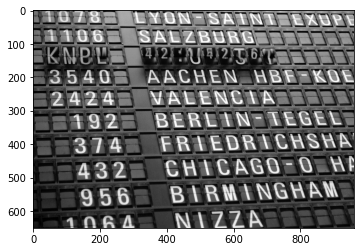

In [ ]:
plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
canny = cv2.Canny(img, 30, 70)

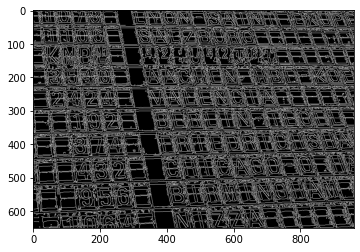

In [ ]:
plt.imshow(canny, cmap='gray')
plt.show()

# 참고

* 코드 참조 : https://opencv-python.readthedocs.io/en/latest/index.html